# Libraries

In [1]:
import pandas as pd
import re
import sys
from typing import List,Dict
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Configurations

In [2]:
# Set a reasonable limit for maximum image pixels
Image.MAX_IMAGE_PIXELS = 3080000000000000000000000000000000000

# Load metadata
meta = pd.read_csv('meta_all_gene.csv')

In [4]:
# check the coordinate of the spot on the slide

def check_image_all(path,slide):
    try:
        temp_image = Image.open(f'{path}/image/{slide}.png')
    except:
        return
    temp_image = temp_image.convert('RGB')
    try:
        coord = pd.read_csv(f'{path}/coord/{slide}.csv')
    except:
        return
    r = coord.r[0] # radius
    plt.clf()
    plt.imshow(temp_image)
    for i in range(len(coord.index)):
        yaxis = coord.yaxis[i]
        xaxis = coord.xaxis[i]
        plt.plot([xaxis-r,xaxis+r],[yaxis-r,yaxis-r],c='lime',alpha=0.5)
        plt.plot([xaxis-r,xaxis+r],[yaxis+r,yaxis+r],c='lime',alpha=0.5)
        plt.plot([xaxis-r,xaxis-r],[yaxis-r,yaxis+r],c='lime',alpha=0.5)
        plt.plot([xaxis+r,xaxis+r],[yaxis-r,yaxis+r],c='lime',alpha=0.5)
    # crop plt
    plt.axis('off')
    plt.axis([coord.xaxis.min()-r*2,coord.xaxis.max()+r*2,coord.yaxis.max()+r*2,coord.yaxis.min()-r*2])
    plt.savefig(f'./check_all_image/{slide}.png',dpi=100,bbox_inches='tight',pad_inches = 0)
    print(f"DONE CHECKING: {path}/image/{slide}.png")

In [5]:
# Crop spots with gene on it

def crop_image_all(path,slide):
    try:
        temp_image = Image.open(f'{path}/image/{slide}.png')
        coord = pd.read_csv(f'{path}/coord/{slide}.csv')
        temp_image = temp_image.convert('RGB')
        r = coord.r[0]
        for i in range(len(coord.index)):
            yaxis = coord.yaxis[i]
            xaxis = coord.xaxis[i]
            spot_name = coord.iloc[i,0]
            temp_image_crop = temp_image.crop((xaxis-r, yaxis-r, xaxis+r, yaxis+r))
            temp_image_crop.save(f"./crop/{spot_name}.png")
        print(f"DONE CROPPING: {path}/image/{slide}.png")
    except:
        pass

# Main code

DONE CHECKING: ./Visium/image/GSE144239_GSM4565823.png
DONE CROPPING: ./Visium/image/GSE144239_GSM4565823.png
DONE CHECKING: ./Visium/image/GSE144239_GSM4565824.png
DONE CROPPING: ./Visium/image/GSE144239_GSM4565824.png


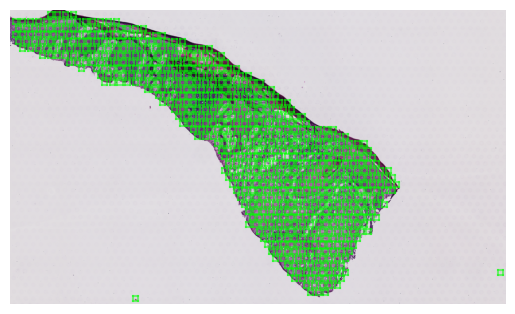

In [6]:
for index in range(len(meta)):
    slide = meta.slide[index]
    tech = meta.tech[index]
    
    path=f'./{tech}'
    check_image_all(path,slide)
    crop_image_all(path, slide)